In [1]:
%%js
var cells = Jupyter.notebook.get_cells();
           for (var i = 0; i < cells.length; i++) {
               var cur_cell = cells[i];
               var tags = cur_cell._metadata.tags;
               console.log(i);
               console.log(tags == undefined);
               console.log(tags);
               if (tags != undefined) {
               for (var j = 0; j < tags.length; j++) {
                  if (tags[j]=="book_only" | tags[j]=="remove-cell") {cur_cell.element.hide();}
                  if (tags[j]=="presentation_only") {cur_cell.element.show();}
            }}}

<IPython.core.display.Javascript object>

In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.signal as sig
from scipy.integrate import simpson
from IPython.display import SVG, display, IFrame, HTML
%matplotlib notebook

In [3]:
%matplotlib inline

def showFig(path,i,ending, width, height):
    #return SVG(filename = "./" + path+str(i)+ending)
    display(SVG(filename = "./" + path+str(i)+ending))

In [4]:
def showFig(path,i,ending, width, height):
    filename = path+str(i)+ending
    return HTML("<img src=\"" + filename +  f"\" style=\"max-height:{height}vh\"/>")

In [5]:
def imshow(img, cmap=None):
    plt.close('all')
    plt.figure()
    plt.imshow(img, cmap=cmap)
    plt.show()

In [6]:
def imshow(img, cmap=None):
    plt.clf()
    plt.imshow(img, cmap=cmap)
    plt.show()

$\begin{align}
  \newcommand{transp}{^\intercal}
  \newcommand{F}{\mathcal{F}}
  \newcommand{Fi}{\mathcal{F}^{-1}}
  \newcommand{inv}{^{-1}}
  \newcommand{stochvec}[1]{\mathbf{\tilde{#1}}}
  \newcommand{argmax}[1]{\underset{#1}{\mathrm{arg\, max}}}
  \newcommand{argmin}[1]{\underset{#1}{\mathrm{arg\, min}}}
\end{align}$

<font size="7"> Computational Imaging </font><br><br><br>

# Fundamental Basics

##### Content
* Optics
* Illumination
* Image acquisition and image formation process

## Optics

Conventional imaging: produce sharp image of scene on image plane.

In [7]:
interact(lambda i: showFig('figures/2/imaging_pinhole_lens_',i,'.svg',800,40), i=widgets.IntSlider(min=1,max=4, step=1, value=1))

interactive(children=(IntSlider(value=1, description='i', max=4, min=1), Output()), _dom_classes=('widget-inte…

<function __main__.<lambda>(i)>

Conventions:
* Camera coordinate system $(x^\mathrm{c}, y^\mathrm{c}, z^\mathrm{c})$ equals world coordinate system $(x^\mathrm{w}, y^\mathrm{w}, z^\mathrm{w})$, hence only camera coordinate system is used.
* Points of the observed scene are called object points and are denoted by $\mathbf{p}^\mathrm{c}=(p^\mathrm{c}_x, p^\mathrm{c}_y, p^\mathrm{c}_z)$.
* Points on the image plane are denoted by $\mathbf{p}^\mathrm{b}=(p^\mathrm{b}_x, p^\mathrm{b}_y)$.

### Pinhole camera

In the case of a pinhole camera, the correspondence between an object point $\mathbf{p}^\mathrm{c}$ and an image point $\mathbf{p}^\mathrm{b}$ is obtained via the intercept theorem:

$\begin{align}
\frac{p^\mathrm{c}_x}{p^\mathrm{c}_z} = - \frac{p^\mathrm{b}_x}{b}\,,
\end{align}$

with image distance $b$.<br><br>
Analogously it is:

$\begin{align}
\frac{p^\mathrm{c}_y}{p^\mathrm{c}_z} = - \frac{p^\mathrm{b}_y}{b}\,.
\end{align}$

Hence:

$\begin{align}
\begin{pmatrix}p^\mathrm{b}_x \\ p^\mathrm{b}_y \end{pmatrix} = -\frac{b}{p^\mathrm{c}_z}\begin{pmatrix} p^\mathrm{c}_x \\ p^\mathrm{c}_y \end{pmatrix} \,.
\end{align}$

<img src="figures/2/pinholePrinciple.svg" style="max-height:40vh">

Imaging equation for pinhole camera:

$\begin{align}
\begin{pmatrix}p^\mathrm{b}_x \\ p^\mathrm{b}_y \end{pmatrix} = -\frac{b}{p^\mathrm{c}_z}\begin{pmatrix} p^\mathrm{c}_x \\ p^\mathrm{c}_y \end{pmatrix} \,.
\end{align}$

Advantages and disadvantages of pinhole cameras:

Advantages:
* Easy principle
* Infinite focus

Disadvantages:
* Images slightly blurry and
* system's low light efficiency
(both caused by the small pinhole)

### Thin lens camera

Common cameras employ a lens to collect light and focus it on the sensor. Even lens systems consisting of multiple lenses can be described via the so-called *thin lens camera* model, where the lens is characterized by its focal length $f$ and its diameter $d$.

<img src="figures/2/thinLensPrinciple.svg" style="max-height:60vh">

* **Principal ray**: Connects $\mathbf{p}^\mathrm{c}$ and $\mathbf{p}^\mathrm{b}$ and runs through the center of the lens.
* **Parallel rays**: Connect $\mathbf{p}^\mathrm{c}$ and $\mathbf{p}^\mathrm{b}$ and run parallel to the optical axis on one side of the lens and cross the optical axis on the other side of the lens at its focal point, i.e., at a distance of $f$ from the lens.

The correspondence between the focal length $f$, the distance $g$ of the plane of focus and the image distance $b$ is given by the so-called *thin lens formula*:

$\begin{align}
\frac{1}{f}=\frac{1}{g}+\frac{1}{b}\,.
\end{align}$

If the thin lens equation is met and if $p^\mathrm{c}_z = g$, the object point is considered to be located in *the plane of focus*.

The magnification $V$ of the system is given by:

$\begin{align}
 V = \frac{\vert p^\mathrm{b}_y \vert}{\vert p^\mathrm{c}_y \vert} \,.
\end{align}$

##### Directional information is lost
The sensor pixel at the position $\mathbf{p}^\mathrm{b}$ receives the whole light bundle, i.e., it integrates over all directions of incidence of the incident light and the directional information is lost.

#### Defocus

The following happens, if the image plane is not located at the image distance $b$ (calculated via the thin lens formula):

<img src="figures/2/thinLensDefocus.svg" style="max-height:40vh">

The light bundle does not converge in a point on the image sensor but is distributed over an area called the *circle of confusion*.

If the area of the circle of confusion exceeds the area of a single pixel of the sensor, the image starts to appear blurred.

<img src="figures/2/thinLensDefocusDetail.svg" style="width:30vw">

The *depth of focus* or *depth of field* denotes the distance at the object side of the lens by which an object point can be moved out of the plane of focus so that the circle of confusion of its converging light bundle still remains below the area of one sensor element.

Evtl: Formel für Schärfentiefe.

If the sensor elements could resolve the direction of incidence of the incident light rays, a sharp image could be reconstructed by combining the respective rays from each sensor to create a synthesized image (more later at light field imaging).

### Aperture

The *aperture* of an optical system is the optical or mechanical element mostly limiting, i.e. blocking, the captured light bundle.

Captured bright object points lying outside the plane of focus form an image of the aperture on the sensor plane. This effect is called *Bokeh* and is sometimes used as a stylistic element in photography.

TODO: Example aperture images / maybe with star aperture

*Stopping down*, i.e., reducing the size of the aperture, reduces the amount of light captured while decreasing the size of the circle of confusion what increases the depth of field:

<img src="figures/2/thinLensDefocusAperture.svg" style="max-height:60vh">

The pattern of the aperture can also be made controllable, e.g., by employing a transmissive LCD. This gives further control over the image formation process and is the key ingredient to *coded aperture imaging* (more later).

### Acquisition of the light's direction of propagation

When imaging with a lens, light rays intersect the image-side *focal plane* (i.e., the plane located with a distance of $f$ to the lens and being oriented perpendicularly to the optical axis) at positions which correspond to the deflection angles of those rays w.r.t. the optical axis:

<img src="figures/2/thinLensPrinciplePlaneOfFocus.svg" style="max-height:60vh">

Objects located at *optical infinity*, i.e., at a distance $g \gg f$, will result in *collimated* light beams, i.e., light rays propagating parallel to each other. The corresponding image points are located on the image-side focal plane:

<img src="figures/2/thinLensPrinciplePlaneOfFocus2.svg" style="max-height:80vh">

The distance $\delta_\alpha$ of the location of the intersection of the converging ray bundle with the focal plane now only depends on the object-side angle of the parallel light beams w.r.t. to the optical axis and on the focal length $f$:

$\begin{align}
\delta_\alpha=f\cdot \tan(\alpha)\,.
\end{align}$

<img src="figures/2/deflectionMeasurement.svg" style="max-height:40vh">

This setup transforms directional information about the light's direction of propagation into spatial information (i.e., the distance $\delta_\alpha$).
By placing a sensor in the focal plane, this information can be captured. Since all rays of the collimated bundle are focused to the same position on the focal plane, any spatial information about the single light rays is lost and has to be obtained by other means.

### Example of directional filtering: Telecentric imaging

Just shown: Spatial positions on the image-side focal plane correspond to directional information about captured light rays. <br> *Spatial filters* placed in the image-side focal plane act as *directional filters* w.r.t. the captured light rays.

Frequently used filter: Pinhole centered at the optical axis.

<img src="figures/2/telecentricImaging.svg" style="max-height:40vh">

Such a pinhole is called a *telecentric stop* and allows only such rays to reach the sensor which propagate (approximately) parallel to the optical axis on the object side.

By this means, the magnification $V$ of the system is independent of the distance of image objects to the lens.

Important: Since the opening of the telecentric stop allows ray bundles of a certain size to reach the sensor, the system is also affected by defocus effects.

## Illumination

### Physical principles of illumination

Two main different physical effects can be exploited to emit light: 
* **Thermal radiation**<br>A certain material is heated (energy supply) and therefore emits light. <br> Examples: Halogen lamps, fluorescent lamps, metal vapor lamps, xenon short-arc lamps.
* **Luminescsent radiation**<br>Potential energy is directly transformed into light.<br> Examples: Gas-discharge lamps, light-emitting diodes (LEDs) and lasers.

The emitted spectrum heavily depends on the employed technology.

### Illumination techniques:

##### Point light source

Concept:<br>
An infinitely small point shaped light source emitting light uniformly in all directions.

<img src="figures/2/pointSource.svg" style="max-width:50vw; max-height:30vh">

Realization:<br>
LEDs (ultra bright ones).

##### Area light source

Concept:<br>
Finite size area of which each point emits beams of light of a certain spectrum uniformly into all directions of the respective half-space.

<img src="figures/2/areaLightSource.svg" style="max-width:50vw; max-height:30vh">

Realization:<br>Multiple LEDs arranged in a dens grid behind a diffuser.

<img src="figures/2/areaLightExample.jpg" style="max-width:50vw; max-height:30vh">

##### Programmable area light sources

Concept:<br>
Similar to the area light source extended by a controllable spatial pattern of the emitted spectrum (including its intensity).

<img src="figures/2/spatiallyControllableAreaLightSource.svg" style="max-width:50vw; max-height:30vh">

Realization:<br> Computer display / projector.

Note: It is also possible to control the direction of propagation of the emitted light as will be shown now for a special case (more later at light field illumination).

##### Telecentric illumination

Concept:<br>Similar to telecentric imaging light sources can be adapted to only emit light rays that propagate approximately parallel to each other.

<img src="figures/2/telecentricLightSource.svg" style="max-width:50vw; max-height:30vh">

Realization: Point light source placed in the focal point of a lens, i.e., with $\delta_\alpha = 0$, so that

$\begin{align}
 0 = f\cdot \tan(\alpha) \Leftrightarrow \alpha = 0^\circ\,.
\end{align}$

<img src="figures/2/telecentricLightSourceExample.png" style="max-width:40vw; max-height:20vh">

Note: It is also possible to realize a telecentric light source with a spatially controllable pattern.

## Image acquisition and image formation process

### Image acquisition model

For the scope of this course (except stated otherwise), the image acquisition process is assumed to follow this model:

<img src="figures/2/imageFormationModel.svg" style="max-height:40vh">

* $L$ : Light field which illuminates the scene and which is generated by the illumination device.
* $L'$: Light field modulated by the scene.
    * $f_\mathrm{phys}(L,\mathbf{\unicode{x3BE}}_\mathrm{geom})$: Modulation, involving geometric parameters $\mathbf{\unicode{x3BE}}_\mathrm{geom}$ (e.g., orientation of the scene).
* $\mathbf{g}$: Digital image resulting from the sensor capturing a section of $L'$.
    * $f_\mathrm{sens}(L',\mathbf{\unicode{x3BE}}_\mathrm{sens})$: Image acquisition, involving parameters $\mathbf{\unicode{x3BE}}_\mathrm{sens}$ (e.g., alignment, orientation and acquisition parameters of the sensor).
* $\mathbf{g'}$: Processed image.
    * $f_\mathrm{proc}(\mathbf{g},\mathbf{\unicode{x3BE}}_\mathrm{proc})$: Image processing algorithms with parameters $\mathbf{\unicode{x3BE}}_\mathrm{proc}\,$.

Image signals $\mathbf{g}$ will typically be modelled as functions<br>

$\begin{align}
\mathbf{g}:\Omega \rightarrow \mathbb{R}^c\,,\quad \Omega \subseteq \mathbb{R}^2
\end{align}$
<br>
defined over a two-dimensional support $\Omega$ and yielding $c$-channel image values $\mathbf{g}$ for every position $\mathbf{x}$:<br><br>
$\begin{align}\mathbf{g}(\mathbf{x})=\begin{pmatrix}
g_1(\mathbf{x})\\ g_2(\mathbf{x}) \\ \vdots \\ g_c (\mathbf{x})
\end{pmatrix}\,, \quad \mathrm{with} \quad \mathbf{x} = 
\begin{pmatrix}
x \\ y
\end{pmatrix}\,.\end{align}$

Note: Digital image signals are usually not continuous, neither w.r.t. their support nor w.r.t. their values.

### Framework system theory

The whole set of imaging components (illumination, lenses, sensor, algorithms, etc.) can be considered as a system $\mathscr{S}$.<br> The system transforms an input signal $\mathbf{f}(\mathbf{x})$ to an output signal $\mathbf{k}(\mathbf{x})$:<br>

$\begin{align}
\mathbf{k}(\mathbf{x})=\mathscr{S}\lbrace \mathbf{f}(\mathbf{x}) \rbrace \,.
\end{align}$

<img src="figures/2/systemTheory.svg" style="max-height:150px">

An important type of systems are so-called **linear shift invariant (LSI) systems** for which the following two properties hold:

##### Linearity
Given two signals $\mathbf{f}(\mathbf{x}), \mathbf{f}'(\mathbf{x})$ and two constants $a, a'$, a system $\mathscr{S}$ is called linear if<br><br>

$\begin{align}
\mathscr{S}\lbrace a\, \mathbf{f}(\mathbf{x}) + a'\, \mathbf{f}'(\mathbf{x})\rbrace=a\, \mathscr{S}\lbrace \mathbf{f}(\mathbf{x})\rbrace + a'\, \mathscr{S}\lbrace \mathbf{f}'(\mathbf{x}) \rbrace\,.
\end{align}$

##### Shift invariance
A system $\mathscr{S}$ is called shift invariant if<br><br>

$\begin{align}
\mathscr{S}\lbrace \mathbf{f}(\mathbf{x}-\mathbf{x}_0) \rbrace = \mathbf{k}(\mathbf{x}-\mathbf{x}_0) \quad \mathrm{with} \quad \mathbf{k}(\mathbf{x})=\mathscr{S}\lbrace\mathbf{f}(\mathbf{x})\rbrace \,.
\end{align}$

The effect of an LSI system on a signal can be comfortably studied by means of its impulse response, which will be explained after the introduction of some necessary definitions.

#### Dirac delta function

Note: For the sake of simplicity, the scalar case is considered at first.

The Dirac delta function $\delta(x)$ is defined via its effect when being used as an integral kernel together with an arbitrary function $f(x)$:<br><br>
$\begin{align}
\int\limits^\infty_{-\infty} \delta(x-x_0)f(x) \mathrm{d}x = f(x_0) \quad \mathrm{with}\, f(x)\, \mathrm{continuous\, at}\, x_0\,. 
\end{align}$<br>
$\Rightarrow$ it extracts the value of $f(x)$ at the position $x_0$.

Assuming $f(x)\equiv 1$ immediately implies <br><br>

$\begin{align}
\int\limits^\infty_{-\infty} \delta (x) \mathrm{d}x = 1\,. 
\end{align}$

The Dirac delta function can be imagined as a very narrow, impulse-shaped function with an integral of $1$. It can be approximated via:<br><br>

$\begin{align}
 \delta_\varepsilon (x):=\frac{1}{\varepsilon}\,\mathrm{rect}(x,\varepsilon) 
\end{align}$

with the **rectangular function** <br>
$\begin{align} \mathrm{rect}(x,\varepsilon):=
\begin{cases}
1 \quad \mathrm{if}\, \vert x \vert < \frac{\varepsilon}{2}\,, \\
0 \quad \mathrm{otherwise}\,,
\end{cases} \end{align}$
with $\varepsilon$ denoting the width of the impulse.

For $\varepsilon \rightarrow 0$ it holds:

$\begin{align}
 \lim_{\varepsilon \rightarrow 0} \int\limits^\infty_{-\infty} \delta_\varepsilon(x-x_0)f(x)\mathrm{d}x=f(x_0)=\int\limits^\infty_{-\infty} \delta(x-x_0)f(x) \mathrm{d}x \quad \mathrm{with}\, f(x)\, \mathrm{continuous\, at}\, x_0\,,
\end{align}$
<br>
since $f(x) \approx f(x_0)$ for a sufficiently small neighborhood of $\varepsilon$ around $x_0$ because of the continuity of $f(x)$ in $x_0$, leading to<br><br>

$\begin{align}
 \delta_\varepsilon(x)\xrightarrow{\varepsilon \rightarrow 0} \delta(x)\,. 
\end{align}$

##### Visualization of the Dirac delta function

In [8]:
def rect(x,eps):
    if np.linalg.norm(x) < (eps/2.0):
        return 1
    else:
        return 0

In [9]:
def diracEps(x,eps):
    return (1.0/eps) * rect(x,eps)

In [10]:
def plotDiracEps(eps):
    factor = 100.0
    xs = np.arange(-5, 5, 1/factor, dtype=np.float32)
    ys = [diracEps(x,eps) for x in xs]
    plt.clf()
    plt.plot(xs, ys)
    print("Integral: " + str(np.sum(ys)/factor))

In [11]:
plt.figure()
interact(plotDiracEps, eps=widgets.FloatSlider(min=0.01, max=2.0, step=0.1, value=2.0))

<Figure size 432x288 with 0 Axes>

interactive(children=(FloatSlider(value=2.0, description='eps', max=2.0, min=0.01), Output()), _dom_classes=('…

<function __main__.plotDiracEps(eps)>

##### 2D Dirac delta function
The two-dimensional Dirac delta function is defined as
$\begin{align}
\int\limits^\infty_{-\infty}\int\limits^\infty_{-\infty}\delta (\mathbf{x}-\mathbf{x_0})f(\mathbf{x})\mathrm{d}\mathbf{x}=f(\mathbf{x}_0)\quad \mathrm{with\,}f(\mathbf{x})\,\mathrm{continuous\,at\,}\mathbf{x}_0\,.
\end{align}$<br>
The same properties hold as for the one-dimensional case.

#### Convolution

The **convolution** $f(x)* h(x)$ of two functions $f(x),h(x)$ is defined as:<br>
$
\begin{align}
f(x)* h(x):= \int\limits^\infty_{-\infty}f(\alpha)h(x-\alpha)\mathrm{d}\alpha=\int\limits^\infty_{-\infty}f(x-\alpha)h(\alpha)\mathrm{d}\alpha\,.
\end{align}
$

Convolving an arbitrary function $f(x)$ with $\delta(x-x_0)$ corresponds to shifting $f(x)$ by $x_0$:<br>
$\begin{align}
f(x)*\delta(x-x_0)=\int\limits^\infty_{-\infty}f(\alpha)\delta(\underbrace{x-x_0-\alpha}_{=\,0\, \Leftrightarrow\, \alpha\, =\, x-x_0})\mathrm{d}\alpha=f(x-x_0)\,.
\end{align}
$

Hence, for $x_0=0:\quad    f(x)*\delta(x)=f(x)\,.$

##### 2D convolution

The two-dimensional convolution of two functions $f(\mathbf{x}), h(\mathbf{x})$ is denoted by the $**$-operator and is defined as follows:<br>
$\begin{align}
    f(\mathbf{x})**h(\mathbf{x}) := \int\limits^\infty_{-\infty}\int\limits^\infty_{-\infty} f\left((\alpha,\beta)^\intercal\right)h\left( (x-\alpha, y-\beta)^\intercal \right)\mathrm{d}\alpha\, \mathrm{d}\beta\,.
\end{align}$

#### Impulse response of an LSI system

The response of an LSI system $\mathscr{S}\lbrace \cdot \rbrace$ to an input signal $f(x)$ can be expressed using a convolution integral:<br>
$\begin{align}
    \mathscr{S}\lbrace f(x)\rbrace = 
    \mathscr{S}\lbrace f(x) * \delta(x) \rbrace &= 
    \mathscr{S} \left\lbrace \int\limits^\infty_{-\infty} f(\alpha)\delta(x-\alpha)\mathrm{d}\alpha \right\rbrace \\ &=
    \int\limits^\infty_{-\infty}f(\alpha)\underbrace{\mathscr{S}\lbrace\delta(x-\alpha)\rbrace}_{h(x-\alpha)}\mathrm{d}\alpha \\ &=
    f(x)*h(x)\,.
\end{align}$

The response $h(x)=\mathscr{S}\lbrace \delta(x) \rbrace$ of $\mathscr{S}\lbrace \cdot \rbrace$ to the input $\delta(x)$ is called the **impulse response** of $\mathscr{S}\lbrace \cdot \rbrace$.

An LSI system is completely characterized by its impulse response $h(x)$.

##### Example: Impulse response of a defocused optical imaging system

For a defocused optical imaging system (see 2.1.2.1), object points from the observed scene are mapped to circles of confusion on the sensor.

<img src="figures/2/thinLensDefocus.svg" style="max-height:40vh">

* Such an optical system can be interpreted and handled as an LSI system. 
* Hence, the impulse response function $h(\mathbf{x})$ is sufficient for the complete characterization of the system.

##### Acquiring $h(\mathbf{x})$

* One way to acquire $h(\mathbf{x})$, is to present an impulse-shaped input to the system and record its answer.
* With respect to optical systems, an impulse corresponds to a scene having only a single bright point centered at the optical axis.
* In the domain of optics, $h(\mathbf{x})$ is often also denoted as the so-called **point spread function (PSF)**, as will be illustrated by the upcoming example.

<img src="figures/2/thinLensDefocusPSF.svg" style="max-height:80vh">

The impulse response $h(\mathbf{x})$ will have the shape of a two-dimensional $\mathrm{rect}$-function:<br>
$\begin{align}
    h(\mathbf{x}) = \mathrm{rect}\left( \Vert x \Vert, \varepsilon \right)\,,
\end{align}$<br>
sometimes also denoted as the so-called **pillbox function** (looks like a round box for drugs).

To simulate the output of the system for a scene, e.g., given as a grayscale image $g(\mathbf{x})$, it is sufficient to calculate $g(\mathbf{x})**\,h(\mathbf{x})$ as will be shown in the following example.

In [12]:
def createPillobxResponse(r):
    X,Y = np.meshgrid(np.arange(-r-1,r+2,1), np.arange(-r-1,r+2,1))
    psf = np.zeros_like(X)
    psf[np.sqrt(X**2+Y**2) <= r] = 1
    #psf = psf * (1 / np.sum(np.sum(psf)))
    return psf, X, Y

In [13]:
psf, X, Y = createPillobxResponse(10)

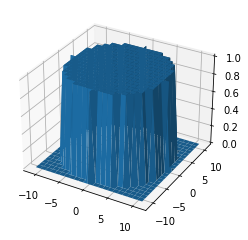

In [14]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, psf)
plt.show()

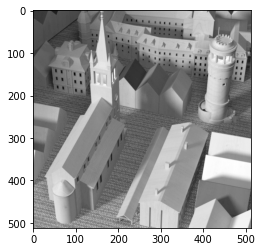

In [15]:
img = cv2.cvtColor(plt.imread('figures/2/input_Cam020.png'), cv2.COLOR_RGB2GRAY)
plt.figure()
imshow(img, cmap='gray')

In [16]:
def defocusExample(r):
    psf, _, _ = createPillobxResponse(r)
    res = sig.convolve2d(img, psf, mode='same', boundary='fill')
    imshow(res, cmap='gray')

In [17]:
plt.figure()
interact(defocusExample, r=widgets.IntSlider(min=0, max=10, step=1, value=3))

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=3, description='r', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.defocusExample(r)>

### Fourier transform

#### Fourier series, trigonometric form

Every periodic function $g(x)$ with a periodic interval $\left[0, L\right]$ can be expressed as a series of weighted sine functions and cosine functions via the so-called Fourier series synthesis:
<br>
$\begin{align}
    g(x) = a_0 + \sum\limits^\infty_{f=1} \left(a_f \cos \left( \frac{2\pi f x}{L} \right) + b_f \sin \left(\frac{2\pi f x}{L} \right)\right)\,,
\end{align}$<br>
with $a_f$ and $b_f$ denoting the Fourier series coefficients.

The Fourier series coefficients are obtained via the Fourier series analysis:
<br>
$\begin{align}
    a_0 &= \frac{1}{L} \int\limits^L_0 g(x)\mathrm{d}x \\
    a_f &= \frac{2}{L} \int\limits^L_0 g(x) \cos\left(\frac{2\pi f x}{L}\right) \mathrm{d}x \\
    b_f &= \frac{2}{L} \int\limits^L_0 g(x) \sin\left(\frac{2\pi f x}{L}\right) \mathrm{d}x 
\end{align}$<br>

The index $f$ denotes the frequency of the approximating oscillations with respect to the periodic interval $\left[0,L\right]$ of $g(x)$.

Higher $f$ correspond to higher frequencies which encode fine details of $g(x)$.

##### Example: Trigonometric Fourier series calculation

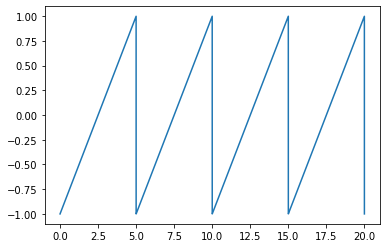

In [18]:
L=20
freq=4
samples=10000
xs = (np.linspace(0,L,samples,endpoint=True))
gs = sig.sawtooth(2*np.pi*xs*freq/L,)
plt.figure()
plt.plot(xs, gs)

In [19]:
a0 = 1/L * simpson(gs,xs)
an = []
bn = []
for i in range(1,110):
    an.append((2.0/L)*simpson(gs*np.cos(2*np.pi*i*xs/L) ,xs))
    bn.append((2.0/L)*simpson(gs*np.sin(2*np.pi*i*xs/L) ,xs))

In [20]:
gs2 = np.zeros_like(xs)
gs2 = gs2 + a0
for i in range(0,len(an)):
    gs2 = gs2 + an[i]*np.cos(2*np.pi*xs/L*(i+1)) + bn[i]*np.sin(2*np.pi*xs/L*(i+1))

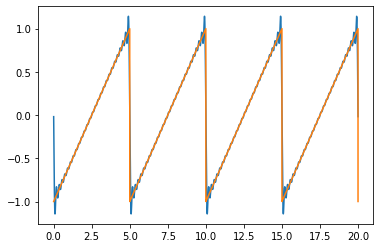

In [21]:
plt.figure()
plt.plot(xs,gs2)
plt.plot(xs,gs)

In [22]:
def reconstrTrigFourier(terms):
    a0 = 1/L * simpson(gs,xs)
    an = []
    bn = []
    for i in range(1,terms):
        an.append((2.0/L)*simpson(gs*np.cos(2*np.pi*i*xs/L) ,xs))
        bn.append((2.0/L)*simpson(gs*np.sin(2*np.pi*i*xs/L) ,xs))
    
    gs2 = np.zeros_like(xs)
    gs2 = gs2 + a0
    for i in range(0,len(an)):
        gs2 = gs2 + an[i]*np.cos(2*np.pi*xs/L*(i+1)) + bn[i]*np.sin(2*np.pi*xs/L*(i+1))

    plt.clf()
    plt.plot(xs,gs2)
    plt.plot(xs,gs)

In [23]:
plt.figure()
interact(reconstrTrigFourier, terms=widgets.IntSlider(min=1, max=100, step=4, value=1))

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=1, description='terms', min=1, step=4), Output()), _dom_classes=('widget…

<function __main__.reconstrTrigFourier(terms)>

#### Fourier series, exponential form

The concept of Fourier series can be further simplified and compacted by making use of complex numbers $a+b\,\mathrm{j} \in \mathbb{C}$ with the imaginary unit $\mathrm{j}$.<br>

Key ingredient to the following considerations is the so-called **Euler's formula**:<br>
$\begin{align}
    \mathrm{e}^{\,\mathrm{j}x}&= \cos(x)+\mathrm{j}\,\sin(x)\,,\\
    \mathrm{e}^{\,-\mathrm{j}x}&= \cos(x)-\mathrm{j}\,\sin(x)\,.
\end{align}$<br>

The Fourier synthesis then simplifies to<br>
$\begin{align}
    g(x)=\sum\limits^{+\infty}_{f=-\infty} c_f \exp\left(\frac{\mathrm{j}2\pi f x}{L}\right)\,,
\end{align}$<br>
with $c_f$ denoting the complex Fourier coefficients.

The complex Fourier coefficients are obtained via the more compact complex Fourier analysis:<br>
$\begin{align}
    c_f = \frac{1}{L} \int\limits^L_0 g(x)\exp\left(\frac{-\mathrm{j}2\pi f x}{L}\right)\mathrm{d}x
\end{align}$<br>

The coefficients are symmetric in the way that $c_i = c^*_{-i}$ with $^*$ denoting the complex conjugate. Hence, all the imaginary parts cancel out during the synthesis.

##### Example: Exponential Fourier series calculation

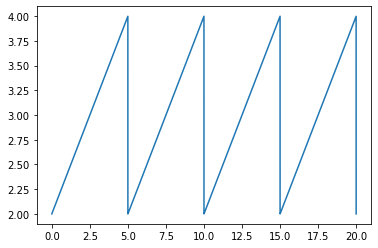

In [24]:
L=20.0
freq=4
samples=10000
xs = (np.linspace(0,L,samples,endpoint=True))
gs = sig.sawtooth(2*np.pi*xs*freq/L,)+3
plt.figure()
plt.plot(xs, gs)

In [25]:
terms = 100
fs = np.arange(-1*terms,terms+1)
cn = np.zeros(len(fs),dtype='complex128')
for i in range(0,len(fs)):
    cn[i]=((1.0/L)*simpson(gs*np.exp(-1j*2*np.pi*fs[i]*xs/L),xs))

In [26]:
gs2 = np.zeros_like(xs)
for i in range(0,len(fs)):
    gs2 = gs2 + cn[i]*np.exp(1j*2*np.pi*fs[i]*xs/L)

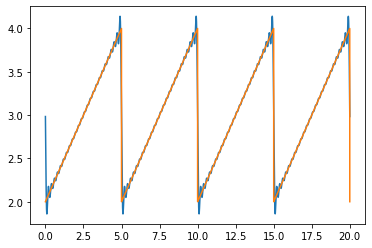

In [27]:
plt.figure()
plt.plot(xs,np.real_if_close(gs2))
plt.plot(xs,gs)

In [28]:
def reconstrExpFourier(terms):
    fs = np.arange(-1*terms,terms+1)
    cn = np.zeros(len(fs),dtype='complex128')
    for i in range(0,len(fs)):
        cn[i]=((1.0/L)*simpson(gs*np.exp(-1j*2*np.pi*fs[i]*xs/L),xs))

    gs2 = np.zeros_like(xs)
    for i in range(0,len(fs)):
        gs2 = gs2 + cn[i]*np.exp(1j*2*np.pi*fs[i]*xs/L)        
        
    plt.clf()
    plt.plot(xs,np.real_if_close(gs2))
    plt.plot(xs,gs)
    

In [29]:
plt.figure()
interact(reconstrExpFourier, terms=widgets.IntSlider(min=1, max=100, step=4, value=20))

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=20, description='terms', min=1, step=4), Output()), _dom_classes=('widge…

<function __main__.reconstrExpFourier(terms)>

#### Fourier transform

The Fourier transform transforms a nearly arbitrary, usually real-valued function $g(x)$ into a complex-valued function $G(f):\mathbb{R}\rightarrow \mathbb{C}$ with frequency $f$:<br>
$\begin{align}
    G(f):=\int\limits^\infty_{-\infty}g(x) \exp (-\mathrm{j}2\pi f x)\,\mathrm{d}x=:\mathscr{F}\lbrace g(x) \rbrace\,,
\end{align}$<br>
which is also called the **spectrum** of $g(x)$.

The inverse transform is given by:<br>
$\begin{align}
    g(x)=\int\limits^\infty_{-\infty}G(f)\exp(\mathrm{j}2\pi f x)\,\mathrm{d}f=:\mathscr{F}^{-1}\lbrace G(f) \rbrace\,.
\end{align}$<br>

Since $G(f)\in \mathbb{C}$, it can be expressed as<br><br>
$\begin{align}
    G(f)=\vert G(f) \vert\cdot \exp(\mathrm{j}\varphi(f)) =  \mathscr{R}\lbrace G(f) \rbrace + \mathrm{j}\,\mathscr{I}\lbrace G(f) \rbrace\,,
\end{align}$<br><br>
with $\vert G(f) \vert$ denoting the **magnitude spectrum**, $\varphi(f)$ denoting the **phase spectrum**, $\mathscr{R}\lbrace G(f) \rbrace$ denoting the real part of $G(f)$ and  $\mathscr{I}\lbrace G(f) \rbrace$ denoting the imaginary part of $G(f)$.

The variable $f$ of $G$ denotes a frequency with respect to spatial positions (not to time!), which is why it is denoted as a **spatial frequency** with unit $\left[f\right]=\left[x\right]^{-1}$.

Common naming conventions:
* **Spatial domain**: the domain of $g(x)$,
* **Fourier domain** or **spatial frequency domain**: the domain of $G(f)$.

##### 2D Fourier transform

The two-dimensional Fourier transform $G(\mathbf{f}):\mathbb{R}^2\rightarrow \mathbb{C},\, \mathbf{f}=(f_x,f_y)^\intercal$ of a two-dimensional function $g(\mathbf{x}):\mathbb{R}^2 \rightarrow \mathbb{C},\, \mathbf{x}=(x,y)^\intercal$ is obtained via the following integral transform:<br>
$\begin{align}
    G(\mathbf{f})=\mathscr{F}\lbrace g(\mathbf{x}) \rbrace := \int\limits^\infty_{-\infty}\int\limits^\infty_{-\infty}g(\mathbf{x}) \exp \left(-\mathrm{j}2\pi\,\mathbf{f}^\intercal \mathbf{x} \right) \mathrm{d} \mathbf{x} \,.
\end{align}$<br>

The inverse transform is given by:<br>
$\begin{align}
    g(\mathbf{x})=\mathscr{F}^{-1}\lbrace G(\mathbf{f}) \rbrace = \int\limits^\infty_{-\infty}\int\limits^\infty_{-\infty} G(\mathbf{f}) \exp\left( \mathrm{j}2\pi\,\mathbf{f}^\intercal \mathbf{x} \right) \mathrm{d}\mathbf{f}\,.
\end{align}$<br>

#### Convolution theorem

Consider the Fourier transform of the convolution of two signals $g(x), h(x)$:
<br>
$\begin{align}
    \mathscr{F}\lbrace g(x) * h(x) \rbrace &= \int\limits^\infty_{-\infty}\int\limits^\infty_{-\infty}g(\alpha)h(x-\alpha)\mathrm{d}\alpha\, \exp\left( -\mathrm{j}2\pi f x  \right)\, \mathrm{d} x\\
    &= \int\limits^\infty_{-\infty}g(\alpha)\int\limits^\infty_{-\infty}h(x-\alpha)\exp\left( -\mathrm{j}2\pi f x  \right)\, \mathrm{d}x\,\mathrm{d} \alpha \,.
\end{align}$<br>

Now, the substitution $\beta:= x- \alpha$ yields:<br>
$\begin{align}
    \mathscr{F}\lbrace g(x) * h(x) \rbrace &=  \int\limits^\infty_{-\infty}g(\alpha)\int\limits^\infty_{-\infty}h(\beta)\exp\left( -\mathrm{j}2\pi f (\alpha + \beta)  \right)\, \mathrm{d}x\,\mathrm{d} \alpha \\
    &= \underbrace{ \int\limits^\infty_{-\infty} g(\alpha) \exp\left( -\mathrm{j}2\pi f \alpha  \right)\, \mathrm{d} \alpha }_{G(f)}\cdot 
    \underbrace{\int\limits^\infty_{-\infty} h(\beta) \exp\left( -\mathrm{j}2\pi f \beta  \right)\, \mathrm{d} \beta}_{H(f)}\,.
\end{align}$<br>

Hence, the Fourier transform transforms the convolution of two signals into a multiplication of their spectra and vice versa:<br>
$\begin{align}
    g(x)*h(x) &= \mathscr{F}^{-1}\lbrace G(f)\cdot H(f) \rbrace \,, \\
    g(x)\cdot h(x) &= \mathscr{F}^{-1}\lbrace G(f) * H(f) \rbrace \,. \\
\end{align}$<br>

This dualism can be exploited in various ways, e.g., to speed up the calculation of a convolution by performing it as a multiplication in the frequency space (i.e., Fourier domain).

#### Discrete Fourier transform (DFT)

The Fourier transform requires unlimited continuous signals what can't be practically realized in a computer (no unlimited storage).

As a practical approximation, the **discrete Fourier transform** (DFT) can be employed.

The signal $g(x)$ is assumed to be sampled at $N$ positions having an equidistant spacing of $\Delta x$, i.e., $x=n \Delta x, n\in\left[0,\ldots,N-1\right]$.

The DFT $G(f)$ of $g(x)$ is then obtained via:<br>
$\begin{align}
    G(f) = \sum\limits^{N-1}_{n=0} g(n\Delta x)\exp\left( -\mathrm{j}2\pi  \frac{fn}{N} \right) \,.
\end{align}$<br>

The inverse DFT is calculated as:<br>
$\begin{align}
    g(n\Delta x)\approx \frac{1}{N} \sum\limits^{N-1}_{f=0} G(f) \exp \left( \mathrm{j}2\pi \frac{fn}{N} \right)\,.
\end{align}$<br>

##### Illustration of the DFT

In [30]:
interact(lambda i: showFig('figures/2/dftSpectrum_',i,'.svg',800,60), i=widgets.IntSlider(min=1,max=3, step=1, value=1))

interactive(children=(IntSlider(value=1, description='i', max=3, min=1), Output()), _dom_classes=('widget-inte…

<function __main__.<lambda>(i)>

##### Note

The following two important properties of the DFT can be seen in the last step of the animation:
1. The DFT implicitly periodically repeats the approximated spectrum.<br>This has to be taken into account when making use of the convolution theorem, since convolutions performed as multiplications in the Fourier domain (calculated with the DFT) have to be regarded as cyclic.

2. The center of the extracted window of length $N$ corresponds to the highest spatial frequencies.<br> By appropriately swapping the window halves, the correct arrangement can be obtained.

##### Example: DFT calculation

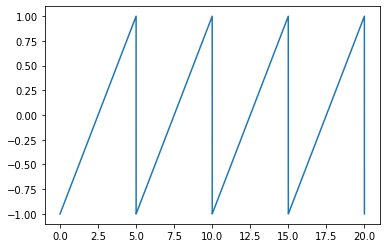

In [31]:
L=20.0
freq=4
samples=10001
xs = (np.linspace(0,L,samples,endpoint=True))
xs2 = np.arange(0,samples)
gs = sig.sawtooth(2*np.pi*xs*freq/L,)
plt.figure()
plt.plot(xs, gs)

In [32]:
cn = np.zeros(samples,dtype='complex128')
for i in range(0,samples):
    cn[i] = np.sum(gs * np.exp(-1j*2*np.pi*xs2*i/samples))

In [33]:
gs2 = np.zeros_like(cn)
for i in range(0,samples):
    gs2[i] = (1.0/samples) * np.sum(cn*np.exp(1j*2*np.pi*xs2*i/samples))

C:\Users\meyjoh\repos\vlcompimg\compimg\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


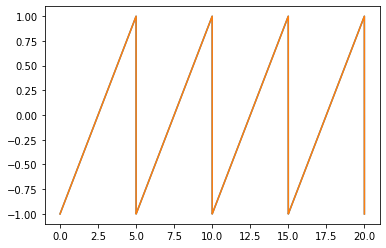

In [34]:
plt.figure()
plt.plot(xs,np.real_if_close(gs2))
plt.plot(xs,gs)

##### Note
In practice, one would employ one of the existing, highly optimized libraries to perform the DFT calculation, e.g., the `numpy.fft` module.

### Example: Image filtering in the Fourier domain

In this example, again the effect of a defocused optical imaging system will be simulated by using the previously introduced pillbox function as the point spread function.

However, this time the convolution will be performed as a multiplication in the Fourier domain.

1. Read the input image, convert it to grayscale and ensure that is has odd dimensions by padding with zeros:

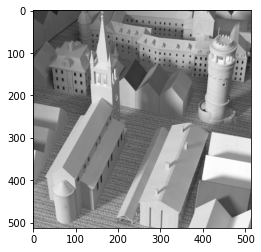

In [35]:
img = cv2.cvtColor(plt.imread('figures/2/input_Cam020.png'), cv2.COLOR_RGB2GRAY)
img = np.pad(img,(((img.shape[0]+1)%2,0),((img.shape[1]+1)%2,0)))
imshow(img, cmap='gray')

2. Create a PSF using the `createPillboxResponse`-function and pad it with zeros so that it matches the size of the input image:

In [36]:
psf,_,_ = createPillobxResponse(5)
rows2add = int((img.shape[0] - psf.shape[0])/2)
cols2add = int((img.shape[1] - psf.shape[1])/2)
psf = np.pad(psf, ((rows2add,rows2add),(cols2add,cols2add)))

3. Transform both, the image and the PSF into the Fourier domain using DFT, shift their spectra into the common arrangement, multiply the spectra, undo the shift and transform the result back into the spatial frequency domain.

In [37]:
imgF = np.fft.fft2(img)         #DFT of img
psfF = np.fft.fft2(             #DFT of
        np.fft.ifftshift(psf))  #shifted psf

imgF = np.fft.fftshift(imgF)    #shifting of imgF
psfF = np.fft.fftshift(psfF)    #shifting of psfF

resF = imgF * psfF              #multiplication of 
                                #the shifted spectra
    
res  = np.fft.ifft2(            #inverse DFT of
        np.fft.ifftshift(resF)) #inverse shift

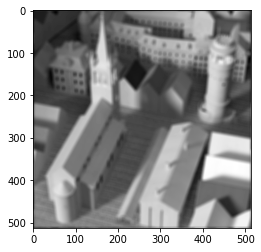

In [38]:
plt.figure()
imshow(np.real(res), cmap='gray')

## TODOS:
* Introduce and explain term OTF.